<div style="text-align: center;">
<img src="https://assets-global.website-files.com/62b9d45fb3f64842a96c9686/62d84db4aeb2f6552f3a2f78_Quantinuum%20Logo__horizontal%20blue.svg" width="200" height="200" /></div>

# Second notebook for ALPS I Hands-on session

## Building Hamiltonian simulation circuits using Pauli operators

We have seen in the lecture that we can consider the task of Quantum (or Hamiltonian) simulation as the realization of the unitary operator

$$
U(t) = e^{- i t \hat{H}}
$$

seen as a quantum circuit.

Consider a general Hamiltonian $\hat{H} = \sum_j \hat{H}_j$ where we now pick a single term and consider it as a tensor product of Pauli operators on the qubits

Pick as example $\hat{H}_0 = X \otimes Y \otimes Z$ and build a circuit for it in `pytket`

In [1]:
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Qubit

H0 = QubitPauliOperator(
    {QubitPauliString([Qubit(0), Qubit(1), Qubit(2)], [Pauli.X, Pauli.Y, Pauli.Z]): 1.0}
)

In [2]:
H0

{(Xq[0], Yq[1], Zq[2]): 1.00000000000000}

In [5]:
num_qubits = len(H0.all_qubits)
print(f"Hamiltonian operator on {num_qubits} qubits")

Hamiltonian operator on 3 qubits


This operator is a $2^3 \times 2^3$ matrix!

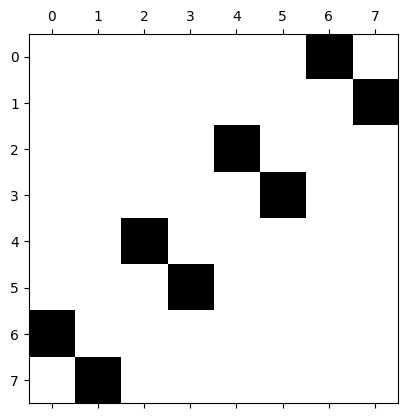

In [6]:
from matplotlib import pyplot as plt 

plt.spy(H0.to_sparse_matrix().todense())

In [7]:
hm = H0.to_sparse_matrix(num_qubits).todense()
hm.imag

matrix([[ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.]])

Having access to the matrix (and the fact that it is rather small) lets us compute the exponential exactly (numerically)!

In [8]:
from scipy.linalg import expm

# Compute the matrix exponential of the Hamiltonian for t=1.0
exp_hm = expm(-1j * hm * 1.0)
exp_hm

array([[ 0.54030231+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.84147098+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.84147098+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.84147098+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.54030231+0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.84147098+0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.84147098+0.j,  0.      

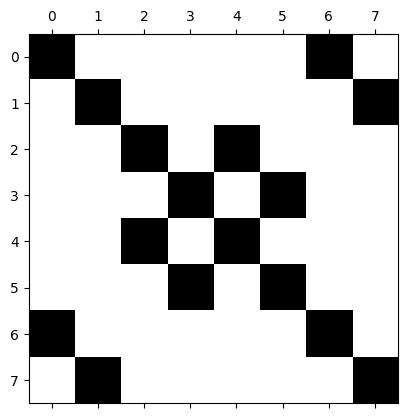

In [9]:
plt.spy(exp_hm)

### Introducing `PauliExpBox`

This approach will not work for large matrices that do not fit in memory. On the other hand, we can use the properties of exponentials of Pauli operators to create quantum circuits as we saw in the lectures.

`pytket` has several features that can help with this. We start by looking at a new circuit _box_ that will contain the circuit representation of

$$
e^{-i t \frac{\pi}{2} \sigma_0 \otimes \sigma_1 \otimes \cdots}
$$

which is called `PauliExpBox` and where `t` is a parameter (and _note the factor of $\pi/2$._)

In [11]:
from pytket.circuit import PauliExpBox
from math import pi

# to build it use a list of Pauli and a coefficient
# if you want the coeff 1 in the final operator, rescale by 2/pi
H0_box = PauliExpBox([Pauli.X, Pauli.Y, Pauli.Z], 2.0/pi)

A box can be added to any set of qubits in a circuit

In [12]:
from pytket.circuit import Circuit

# add a box to a circuit
pauli_circ = Circuit(num_qubits, name="Pauli exponential")
pauli_circ.add_pauliexpbox(H0_box, [0, 1, 2])

[PauliExpBox q[0], q[1], q[2]; ]

In [13]:
from pytket.circuit.display import render_circuit_jupyter as draw

draw(pauli_circ)

In [14]:
pauli_circ.get_unitary()

array([[ 0.54030231+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.84147098+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.84147098+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.84147098+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.54030231+0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.84147098+0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.84147098+0.j,  0.      

We can check that the unitary represented by the circuit above is exactly the same as the matrix we obtained from exponentiating the Hamiltonian:

In [15]:
import numpy as np

np.allclose(pauli_circ.get_unitary(), exp_hm)

True

### Decomposing `PauliExpBox`

Every _box_ in the circuit can be *decomposed* into a set of predefined gates using hard-coded rules. Here we decompose our circuit for unitary time evolution

In [16]:
from pytket.passes import DecomposeBoxes

decomposed_circ = pauli_circ.copy()
DecomposeBoxes().apply(decomposed_circ)

True

In [17]:
draw(decomposed_circ)

There is a convenience function in `pytket` that will take any Hamiltonian in the form of a `QubitPauliOperator` and built the unitary circuit that exponentiates it

In [21]:
from pytket.utils import gen_term_sequence_circuit

initial_circuit = Circuit(num_qubits, name="One trotter step")
trotter_step_circ = gen_term_sequence_circuit(H0*(2.0/pi), initial_circuit)

In [22]:
draw(trotter_step_circ)

In [23]:
np.allclose(trotter_step_circ.get_unitary(), exp_hm)

True

## Running circuits in `pytket`

`pytket` can give you the statevector and the unitary matrix of small circuits, but this feature becomes exponentially more costly with the increasing number of qubits.
Moreover, statevector and unitary matrices are not what you get as output from quantum computers.

### Using a simulator

Simulators and quantum devices are interfaced with `pytket` through extensions. In NEXUS this is abstracted away as we will see later.
When you want to run simulation on your laptop or local server, this is the workflow:

- Install the `pytket` extension that connects to the simulator you need ([Here is a list](https://tket.quantinuum.com/api-docs/extensions.html))
- Import the extension and define a `backend`
- Compile the circuit for the `backend` of your choice
- Process the circuit (this may require connecting to the cloud depending on the `backend`)
- Retrieve the results

### Example with `AerSimulator`

We use `qiskit` Aer simulator to run our W-state circuit from the first notebook

In [32]:
from pytket.qasm import circuit_from_qasm

w_state_circ = circuit_from_qasm("W-state.qasm")
draw(w_state_circ)

Set up the backend

In [27]:
from pytket.extensions.qiskit import AerBackend

aer_b = AerBackend()

In [30]:
aer_b.backend_info.to_dict()

{'name': 'AerBackend',
 'device_name': 'aer_simulator',
 'version': '0.53.0',
 'architecture': {'nodes': [['fcNode', [0]],
   ['fcNode', [1]],
   ['fcNode', [2]],
   ['fcNode', [3]],
   ['fcNode', [4]],
   ['fcNode', [5]],
   ['fcNode', [6]],
   ['fcNode', [7]],
   ['fcNode', [8]],
   ['fcNode', [9]],
   ['fcNode', [10]],
   ['fcNode', [11]],
   ['fcNode', [12]],
   ['fcNode', [13]],
   ['fcNode', [14]],
   ['fcNode', [15]],
   ['fcNode', [16]],
   ['fcNode', [17]],
   ['fcNode', [18]],
   ['fcNode', [19]],
   ['fcNode', [20]],
   ['fcNode', [21]],
   ['fcNode', [22]],
   ['fcNode', [23]],
   ['fcNode', [24]],
   ['fcNode', [25]],
   ['fcNode', [26]],
   ['fcNode', [27]],
   ['fcNode', [28]],
   ['fcNode', [29]],
   ['fcNode', [30]],
   ['fcNode', [31]],
   ['fcNode', [32]],
   ['fcNode', [33]],
   ['fcNode', [34]],
   ['fcNode', [35]],
   ['fcNode', [36]],
   ['fcNode', [37]],
   ['fcNode', [38]],
   ['fcNode', [39]]]},
 'gate_set': [8,
  17,
  22,
  23,
  24,
  25,
  26,
  27,
  28,


Compile the circuit to make sure the operations you have in your circuit satisfy the requirements of the backend:
* What are the native gates you can use?
* What is the connectivity between qubits?

In [33]:
w_state_circ_compiled = aer_b.get_compiled_circuit(w_state_circ, optimisation_level=2)
draw(w_state_circ_compiled)

In [34]:
from pytket.utils import gate_counts

gate_counts(w_state_circ_compiled)

Counter({<OpType.TK1: 43>: 8, <OpType.CX: 45>: 6, <OpType.Measure: 66>: 3})

Run the circuit by _submitting a job_ (in this case the `AerBackend` will run locally on your machine so you will get the result immediately)

In [35]:
number_of_shots = 1024

handle = aer_b.process_circuit(w_state_circ_compiled, n_shots=number_of_shots)

In [36]:
print(handle)

('5e057eac-f4a4-4b8e-81ff-4bc40ef72a51', 0, 3, 'null')


This can be used to retrieve a job once it is ready with results

In [38]:
status = aer_b.circuit_status(handle)
print(status.status)

StatusEnum.COMPLETED


Get results!

In [40]:
results = aer_b.get_result(handle)
print(type(results))

<class 'pytket.backends.backendresult.BackendResult'>


The `BackendResult` object has many convenient methods to extract quantities of interest:
- counts
- bitstrings
- probabilities
- statevector
- density matrix

Not all are supported

In [42]:
aer_b.supports_state

False

In [43]:
counts = results.get_counts()
print(counts)

Counter({(0, 1, 0): 356, (0, 0, 1): 338, (1, 0, 0): 330})


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_counts(counts):
    counts_record = [
        {"State": str(state), "Count": count} for state, count in counts.items()
    ]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x="State", y="Count", kind="bar", data=count_df, aspect=6, height=4)
    plt.show()

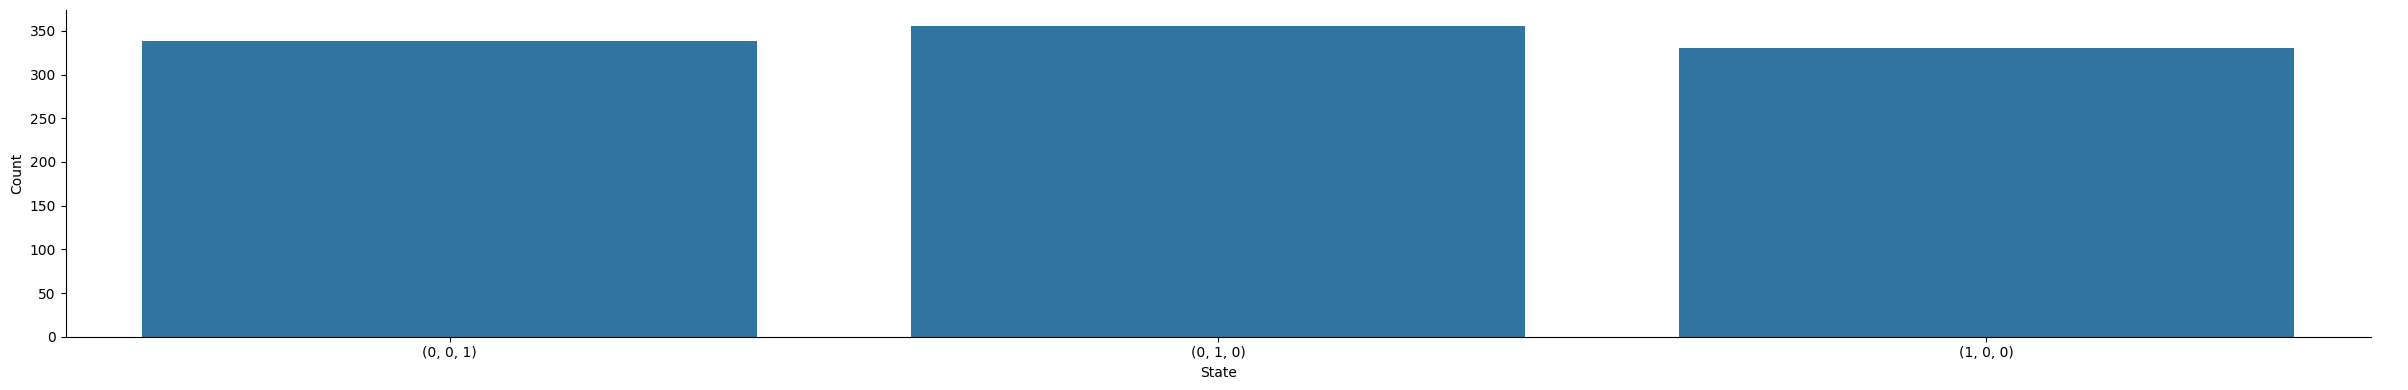

In [49]:
plot_counts(counts)

In [50]:
results.get_distribution()

{(0, 0, 1): 0.330078125, (0, 1, 0): 0.34765625, (1, 0, 0): 0.322265625}